In [1]:
import pandas as pd
from csv import reader
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
#utils
import os 
import chardet
import datetime as dt
import jovian

#
%matplotlib inline

In [2]:
chardet.detect(open(os.path.join('data', 'iso.csv'), 'rb').read())

{'encoding': 'UTF-16', 'confidence': 1.0, 'language': ''}

In [3]:
#read data
inov = pd.read_csv('data/inovação.csv', encoding='UTF-16', sep='\t', skiprows=2)
iso = pd.read_csv('data/iso.csv' , encoding='UTF-16', sep='\t', skiprows=2)

In [4]:
def pre_process(df):
    df = df.copy()
    df = df.dropna(axis=1,thresh=50)
    #df = df.dropna(axis=0)
    return df

def make_trend(df):
    df = df.copy()
    
    date_subset = df.filter(like='Searches',axis=1)
    date_subset = date_subset.rename(columns=lambda x: dt.datetime.strptime(x,'Searches: %b %Y').date().strftime("%b-%y"))                                               
    df = df[['Keyword']].join(date_subset)
                            
    df = df.set_index('Keyword')
    df = df.T.sort_index()
    return df


In [5]:
# limpa e seleciona entradas com mais de 50 pesquisas e cria tabelas temporais

trend_inov = make_trend(pre_process(inov))
trend_inov_relevant = trend_inov.loc[:,trend_inov.mean(axis=0) >= 35]

trend_iso = make_trend(pre_process(iso))
trend_iso_relevant = trend_iso.loc[:,trend_iso.mean(axis=0) >= 35]





<AxesSubplot:ylabel='Keyword'>

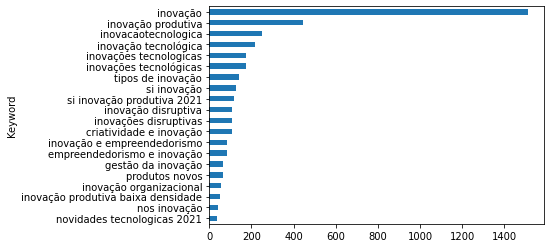

In [6]:
trend_inov_relevant.mean().sort_values(ascending=True).plot(kind='barh')

<AxesSubplot:ylabel='Keyword'>

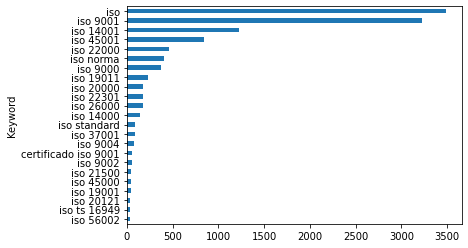

In [7]:
trend_iso_relevant.mean().sort_values(ascending=True).plot(kind='barh')

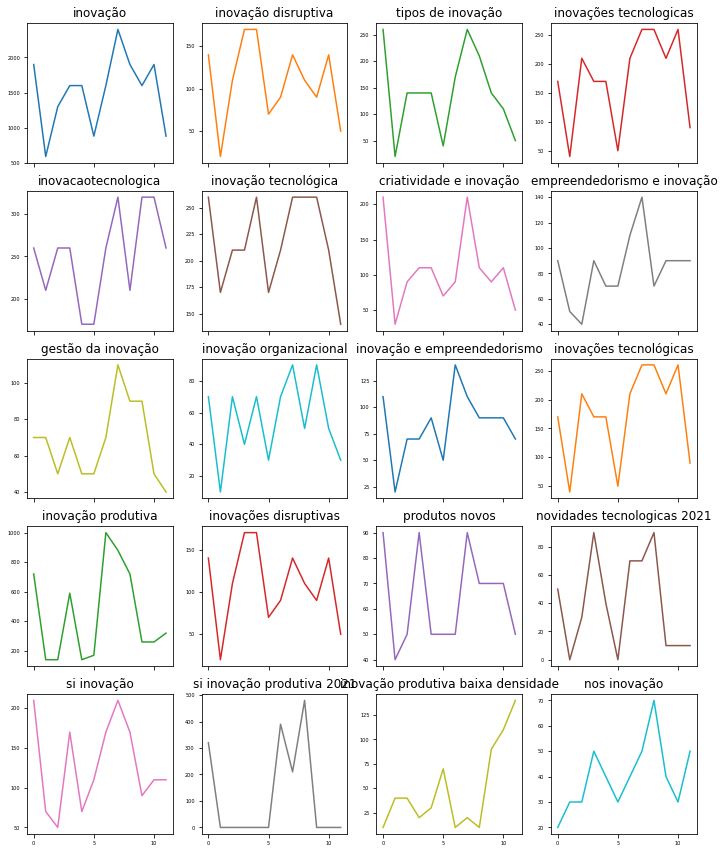

In [8]:
trend_inov_relevant.plot(subplots=True, 
                         layout=(6,4), 
                         figsize=(12,18), 
                         legend=False, 
                         title=trend_inov_relevant.columns.to_list(), 
                         use_index=False,
                         xlabel = trend_inov_relevant.index,
                         fontsize=5 )
plt.show()

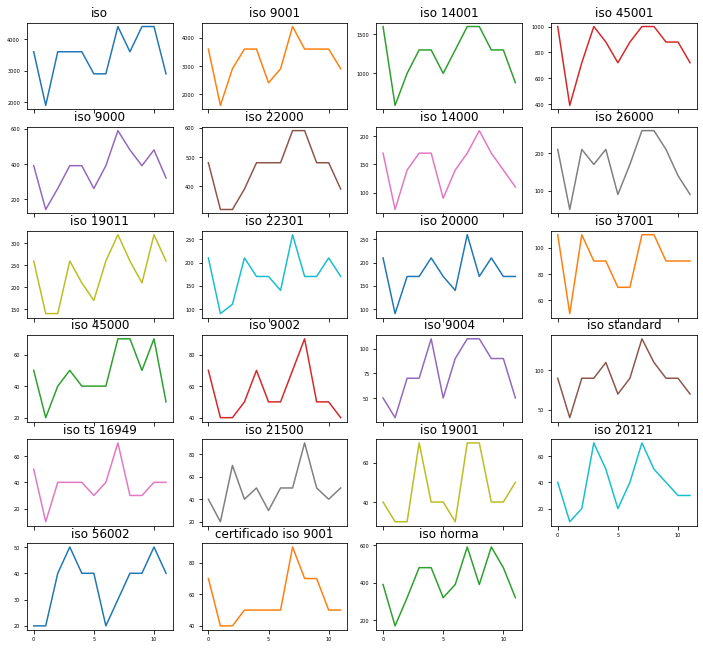

In [9]:
trend_iso_relevant.plot(subplots=True, layout=(8,4), figsize=(12,15), legend=False, title=trend_iso_relevant.columns.to_list(), use_index=False, fontsize=5 )
plt.show()

In [10]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Committed successfully! https://jovian.ai/tiagoferrao/seo-analysis


'https://jovian.ai/tiagoferrao/seo-analysis'